In [2]:
import sklearn
import numpy as np
import pandas as pd

Se carga el archivo y se separa en entrenamiento y prueba

In [3]:
from sklearn.model_selection import train_test_split
dataALL=pd.read_csv('games.csv')  
N=len(dataALL)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(dataALL, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [4]:
train_data.shape

(40228, 18)

In [5]:
train_data.head()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
29341,1862,1,1,1,1,2,0,8,1,1,1,0,5,0,0,1,0,1
36280,2156,2,1,2,2,1,0,5,0,0,2,0,10,3,2,2,0,2
11119,1896,2,2,2,2,1,2,2,0,0,1,0,9,1,1,1,1,2
40872,2118,1,1,2,1,2,1,3,0,1,0,1,11,4,1,3,0,2
238,1786,2,2,2,0,2,0,2,0,0,0,0,9,1,0,3,0,2


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40228 entries, 29341 to 41855
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        40228 non-null  int64
 1   firstBlood          40228 non-null  int64
 2   firstTower          40228 non-null  int64
 3   firstInhibitor      40228 non-null  int64
 4   firstBaron          40228 non-null  int64
 5   firstDragon         40228 non-null  int64
 6   firstRiftHerald     40228 non-null  int64
 7   t1_towerKills       40228 non-null  int64
 8   t1_inhibitorKills   40228 non-null  int64
 9   t1_baronKills       40228 non-null  int64
 10  t1_dragonKills      40228 non-null  int64
 11  t1_riftHeraldKills  40228 non-null  int64
 12  t2_towerKills       40228 non-null  int64
 13  t2_inhibitorKills   40228 non-null  int64
 14  t2_baronKills       40228 non-null  int64
 15  t2_dragonKills      40228 non-null  int64
 16  t2_riftHeraldKills  40228 non-null  

In [7]:
train_data[["gameDuration", "firstBlood","firstTower","firstInhibitor"]].describe()

,gameDuration,firstBlood,firstTower,firstInhibitor
count,40228.000000,40228.000000,40228.000000,40228.000000
mean,1872.827110,1.487248,1.484116,1.339738
std,450.406184,0.499844,0.500350,0.653811
min,610.000000,1.000000,0.000000,0.000000
25%,1555.000000,1.000000,1.000000,1.000000
50%,1848.000000,1.000000,1.000000,1.000000
75%,2158.000000,2.000000,2.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000


### Pipeline para los atributos numéricos

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 14 atributos numéricos
num_attribs = ["gameDuration", "firstBlood", "firstInhibitor", "firstTower","firstDragon","firstBaron","firstRiftHerald","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t1_riftHeraldKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills","t2_riftHeraldKills"]

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    
    ])

### Pipeline completo

In [9]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

### Extraemos las etiquetas de clase

In [10]:
X_train = full_pipeline.fit_transform(train_data)

In [11]:
X_train.shape

(40228, 17)

In [12]:
X_train[0,:]

array([-0.02403885, -0.97481248, -0.51963435, -0.96756508,  0.98746597,
        0.06069025, -0.90874144,  0.57978983, -0.03145838,  1.0559603 ,
       -0.35141948, -0.59074721, -0.18076436, -0.80070922, -0.68778029,
       -0.36089419, -0.56927451])

In [13]:
y_train = train_data["winner"]
y_train

29341    1
36280    2
11119    2
40872    2
238      2
        ..
12499    1
29875    2
9069     2
2236     1
41855    1
Name: winner, Length: 40228, dtype: int64

# Árboles de decisión
## Algoritmo DecisionTreeClassifier

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


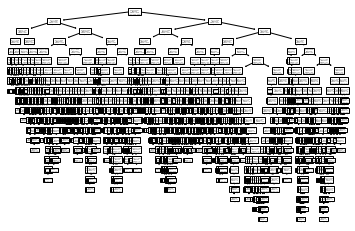

In [15]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo1= tree.DecisionTreeClassifier(criterion='gini',max_depth=100,splitter="best",random_state=123)
modelo1.fit(X_train, y_train)
scores1 = cross_val_score(modelo1, X_train, y_train, cv=5,scoring='accuracy')
print(scores1)
print(scores1.mean())

tree.plot_tree(modelo1)
tree.export_graphviz(decision_tree=modelo1, class_names=True,out_file="Arbol LOL 1.dot")

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


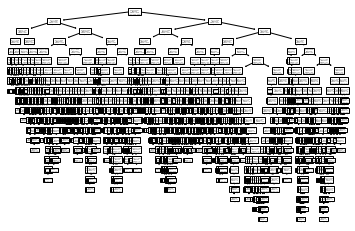

In [16]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo2 = tree.DecisionTreeClassifier(criterion='gini',max_depth=200,splitter="best",random_state=123)
modelo2.fit(X_train, y_train)
scores2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='accuracy')
print(scores2)
print(scores2.mean())

tree.plot_tree(modelo2)
tree.export_graphviz(decision_tree=modelo2, class_names=True,out_file="Arbol LOL 2.dot")

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


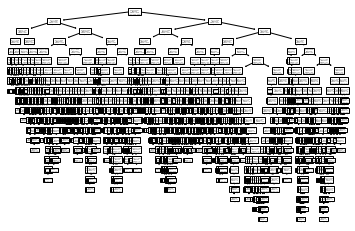

In [18]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo3 = tree.DecisionTreeClassifier(criterion='gini',max_depth=300,splitter="best",random_state=123)
modelo3.fit(X_train, y_train)
scores3 = cross_val_score(modelo3, X_train, y_train, cv=5, scoring='accuracy')
print(scores3)
print(scores3.mean())

tree.plot_tree(modelo3)
tree.export_graphviz(decision_tree=modelo3, class_names=True,out_file="Arbol LOL 3.dot")

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


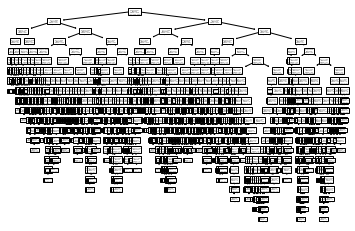

In [19]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo4 = tree.DecisionTreeClassifier(criterion='gini',max_depth=400,splitter="best",random_state=123)
modelo4.fit(X_train, y_train)
scores4 = cross_val_score(modelo4, X_train, y_train, cv=5, scoring='accuracy')
print(scores4)
print(scores4.mean())

tree.plot_tree(modelo4)
tree.export_graphviz(decision_tree=modelo4, class_names=True,out_file="Arbol LOL 4.dot")

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


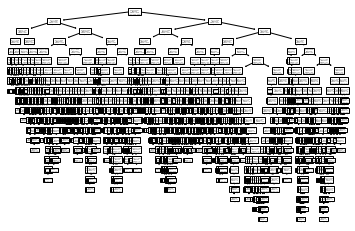

In [17]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo5 = tree.DecisionTreeClassifier(criterion='gini',max_depth=500,splitter="best",random_state=123)
modelo5.fit(X_train, y_train)
scores5 = cross_val_score(modelo5, X_train, y_train, cv=5, scoring='accuracy')
print(scores5)
print(scores5.mean())

tree.plot_tree(modelo5)
tree.export_graphviz(decision_tree=modelo5, class_names=True,out_file="Arbol LOL 5.dot")

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


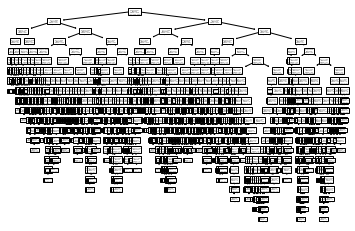

In [20]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo6 = tree.DecisionTreeClassifier(criterion='gini',max_depth=600,splitter="best",random_state=123)
modelo6.fit(X_train, y_train)
scores6 = cross_val_score(modelo6, X_train, y_train, cv=5, scoring='accuracy')
print(scores6)
print(scores6.mean())

tree.plot_tree(modelo6)
tree.export_graphviz(decision_tree=modelo6, class_names=True,out_file="Arbol LOL 6.dot")

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


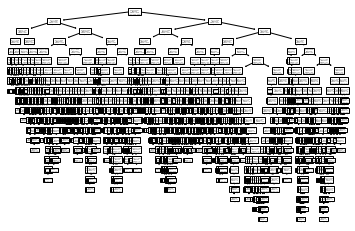

In [21]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo7 = tree.DecisionTreeClassifier(criterion='gini',max_depth=700,splitter="best",random_state=123)
modelo7.fit(X_train, y_train)
scores7 = cross_val_score(modelo7, X_train, y_train, cv=5, scoring='accuracy')
print(scores7)
print(scores7.mean())

tree.plot_tree(modelo7)
tree.export_graphviz(decision_tree=modelo7, class_names=True,out_file="Arbol LOL 7.dot")

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


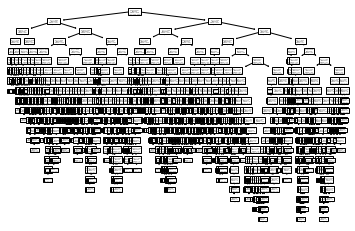

In [22]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo8 = tree.DecisionTreeClassifier(criterion='gini',max_depth=800,splitter="best",random_state=123)
modelo8.fit(X_train, y_train)
scores8 = cross_val_score(modelo8, X_train, y_train, cv=5, scoring='accuracy')
print(scores8)
print(scores8.mean())

tree.plot_tree(modelo8)
tree.export_graphviz(decision_tree=modelo8, class_names=True,out_file="Arbol LOL 8.dot")

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


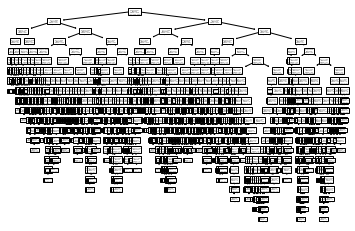

In [23]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo9 = tree.DecisionTreeClassifier(criterion='gini',max_depth=900,splitter="best",random_state=123)
modelo9.fit(X_train, y_train)
scores9 = cross_val_score(modelo9, X_train, y_train, cv=5, scoring='accuracy')
print(scores9)
print(scores9.mean())

tree.plot_tree(modelo9)
tree.export_graphviz(decision_tree=modelo9, class_names=True,out_file="Arbol LOL 9.dot")

[0.97104151 0.97278151 0.96830723 0.97178372 0.97352393]
0.971487579111223


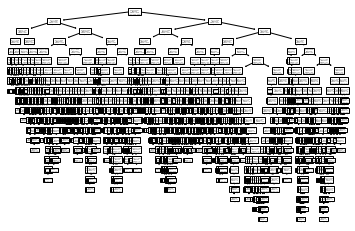

In [24]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo10 = tree.DecisionTreeClassifier(criterion='gini',max_depth=1000,splitter="best",random_state=123)
modelo10.fit(X_train, y_train)
scores10 = cross_val_score(modelo10, X_train, y_train, cv=5, scoring='accuracy')
print(scores10)
print(scores10.mean())

tree.plot_tree(modelo10)
tree.export_graphviz(decision_tree=modelo10, class_names=True,out_file="Arbol LOL 10.dot")

# Analicemos el desempeño en el conjunto de prueba

In [25]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-0.3903794 , -0.97481248, -0.51963435, ..., -0.68778029,
        -1.17996621, -0.56927451],
       [-0.49473095,  1.02583832,  1.0098784 , ...,  0.93051681,
         0.45817783, -0.56927451],
       [ 0.24905138, -0.97481248, -0.51963435, ..., -0.68778029,
         0.45817783,  1.75662178],
       ...,
       [-1.07865559,  1.02583832,  1.0098784 , ..., -0.68778029,
         1.27724984,  1.75662178],
       [-1.09197707, -0.97481248, -2.04914711, ..., -0.68778029,
        -1.17996621,  1.75662178],
       [ 2.5003806 ,  1.02583832, -0.51963435, ...,  0.93051681,
         3.7344659 , -0.56927451]])

In [26]:
y_pred1 = modelo1.predict(X_test) 
y_pred1

array([1, 2, 1, ..., 2, 1, 1])

In [27]:
y_pred2 = modelo2.predict(X_test) 
y_pred2

array([1, 2, 1, ..., 2, 1, 1])

In [28]:
y_pred3 = modelo3.predict(X_test) 
y_pred3

array([1, 2, 1, ..., 2, 1, 1])

In [29]:
y_pred4 = modelo4.predict(X_test) 
y_pred4

array([1, 2, 1, ..., 2, 1, 1])

In [30]:
y_pred5 = modelo5.predict(X_test) 
y_pred5

array([1, 2, 1, ..., 2, 1, 1])

In [31]:
y_pred6 = modelo6.predict(X_test) 
y_pred6

array([1, 2, 1, ..., 2, 1, 1])

In [32]:
y_pred7 = modelo7.predict(X_test) 
y_pred7

array([1, 2, 1, ..., 2, 1, 1])

In [33]:
y_pred8 = modelo8.predict(X_test) 
y_pred8

array([1, 2, 1, ..., 2, 1, 1])

In [34]:
y_pred9 = modelo9.predict(X_test) 
y_pred9

array([1, 2, 1, ..., 2, 1, 1])

In [35]:
y_pred10 = modelo10.predict(X_test) 
y_pred10

array([1, 2, 1, ..., 2, 1, 1])

In [36]:
y_test = test_data["winner"]

In [37]:
y_test

19638    1
46003    2
38309    1
19692    1
44065    2
        ..
3794     2
11218    1
29546    2
25609    1
6582     1
Name: winner, Length: 10058, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.9710678067210181

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9710678067210181

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.9710678067210181

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

0.9710678067210181

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5)

0.9710678067210181

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred6)

0.9710678067210181

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred7)

0.9710678067210181

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred8)

0.9710678067210181

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred9)

0.9710678067210181

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred10)

0.9710678067210181

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred1)
confusion_matrix1

array([[4954,  129],
       [ 129, 4846]])

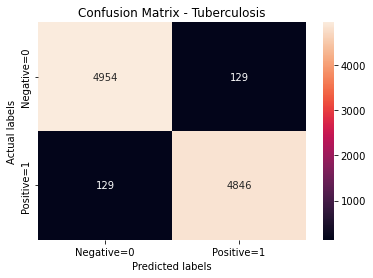

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix1, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - Tuberculosis') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9733545436468483

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, y_pred2)
confusion_matrix2

array([[4943,  140],
       [ 128, 4847]])

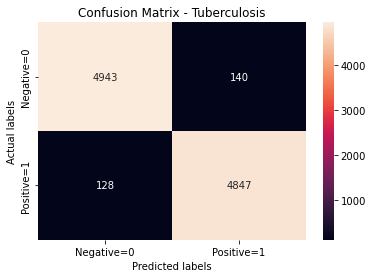

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix2, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - Tuberculosis') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();